<a href="https://colab.research.google.com/github/komalshyam/LMVVIP-DataScience/blob/main/LMV_Task_1_Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as ny
import matplotlib.pyplot as  mat
import pandas as pd
import pandas_datareader as pddr
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [2]:
#loading dataset
url= 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data = pd.read_csv(url)


Checking dataset


In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
data.shape

(2035, 8)

In [6]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
data1=data.reset_index()['Close']

In [8]:
data1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [9]:
data1.shape

(2035,)

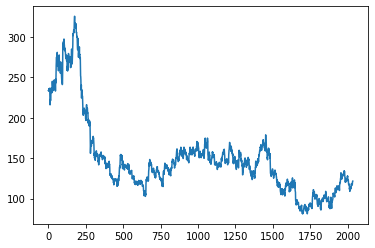

In [10]:
mat.plot(data1)

In [11]:
scaler = MinMaxScaler(feature_range = (0,1))
data1 = scaler.fit_transform(ny.array(data1).reshape(-1,1))

In [12]:
data1.shape

(2035, 1)

In [13]:
print(data1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [14]:
##break database into train and test range

In [15]:
training_range = int(len(data1)*0.70)
test_range = len(data1) - training_range
train_data, test_data = data1[0:training_range,:],data1[training_range:len(data1),:1]

In [16]:
training_range

1424

In [17]:
test_range

611

In [18]:
print(train_data)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.32618464]
 [0.32271242]
 [0.3247549 ]]


In [19]:
##convert array list into dataset matrix

In [20]:
def create_dataset(dataset, time_interval = 1):
  dataL, dataR = [],[]
  for i in range(len(dataset) - time_interval -1):
    a = dataset[i:(i+time_interval),0]
    dataL.append(a)
    dataR.append(dataset[i+time_interval,0])
    return ny.array(dataL),ny.array(dataR)


In [21]:
#Reshape into L=t,t=1,t=2 and R=t+3
time_interval = 100
L_train, R_train = create_dataset(train_data, time_interval)
L_test, R_test = create_dataset(test_data, time_interval)

In [22]:
print(L_train)

[[0.62418301 0.62214052 0.62622549 0.63378268 0.62234477 0.62765523
  0.62888072 0.62949346 0.63582516 0.625      0.57883987 0.55167484
  0.57618464 0.58006536 0.57230392 0.57781863 0.58312908 0.63623366
  0.62642974 0.63337418 0.62745098 0.62254902 0.6376634  0.61294935
  0.63112745 0.65196078 0.67075163 0.66196895 0.64705882 0.63970588
  0.62745098 0.62336601 0.63868464 0.63480392 0.63991013 0.64767157
  0.62785948 0.63112745 0.63194444 0.67790033 0.65870098 0.65890523
  0.64603758 0.63705065 0.67544935 0.66319444 0.6439951  0.62152778
  0.64419935 0.68198529 0.6629902  0.72691993 0.75265523 0.77144608
  0.79166667 0.79370915 0.75714869 0.77736928 0.80208333 0.81719771
  0.7495915  0.76960784 0.74754902 0.75428922 0.76143791 0.74979575
  0.73999183 0.72406046 0.73488562 0.76021242 0.79411765 0.78104575
  0.80412582 0.77062908 0.76245915 0.74652778 0.75980392 0.76041667
  0.75490196 0.74673203 0.7120098  0.74468954 0.7689951  0.74979575
  0.72120098 0.73406863 0.72263072 0.70894608 0.

In [23]:
print(R_train)

[0.87111928]


In [24]:
print(L_test.shape),print(R_test.shape)

(1, 100)
(1,)


(None, None)

In [25]:
#Reshape the input to the desired requirment of LSTM
L_train = L_train.reshape(L_train.shape[0],L_train.shape[1],1)
L_test = L_test.reshape(L_test.shape[0],L_test.shape[1],1)

Creating the LSTM Stacked model

In [26]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [27]:
tf.__version__

'2.8.0'

In [28]:
model = Sequential()
model.add(LSTM(50, return_sequences = True,input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

In [29]:
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(L_train, R_train, validation_data = (L_test,R_test), epochs = 50,batch_size = 64, verbose = 1)

Epoch 1/50
1/1 [==============================] - 15s 15s/step - loss: 0.7171 - val_loss: 0.0237
Epoch 2/50
1/1 [==============================] - 0s 286ms/step - loss: 0.6189 - val_loss: 0.0155
Epoch 3/50
1/1 [==============================] - 0s 305ms/step - loss: 0.5194 - val_loss: 0.0081
Epoch 4/50
1/1 [==============================] - 0s 283ms/step - loss: 0.4137 - val_loss: 0.0022
Epoch 5/50
1/1 [==============================] - 0s 299ms/step - loss: 0.2982 - val_loss: 6.0098e-05
Epoch 6/50
1/1 [==============================] - 0s 298ms/step - loss: 0.1753 - val_loss: 0.0067
Epoch 7/50
1/1 [==============================] - 0s 298ms/step - loss: 0.0613 - val_loss: 0.0333
Epoch 8/50
1/1 [==============================] - 0s 287ms/step - loss: 3.5566e-04 - val_loss: 0.0937
Epoch 9/50
1/1 [==============================] - 0s 284ms/step - loss: 0.0597 - val_loss: 0.1360
Epoch 10/50
1/1 [==============================] - 0s 296ms/step - loss: 0.1189 - val_loss: 0.1322
Epoch 11/50


In [32]:
train_predict = model.predict(L_train)
test_predict=model.predict(L_test)

Rescale our data to orignal scale to do the analysis

In [33]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Calculate the RMS performance

In [34]:
math.sqrt(mean_squared_error(R_train,train_predict))

301.408116558798

Test the dateset for RMS

In [35]:
math.sqrt(mean_squared_error(R_test,test_predict))

205.28783940333946

Plotting Result

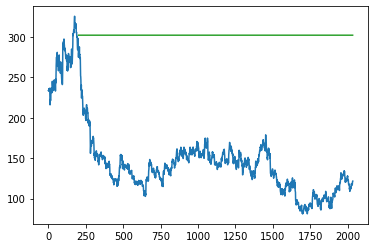

In [36]:
#Train prediction for plotting
look_back = 100
trainPredictPlot = ny.empty_like(data1)
trainPredictPlot[:,:] = ny.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#Test prediction for plotting
testPredictPlot = ny.empty_like(data1)
testPredictPlot[:,:]= ny.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(data1) - 1, :] = train_predict
#Plot baseline and predictions
mat.plot(scaler.inverse_transform(data1))
mat.plot(trainPredictPlot)
mat.plot(testPredictPlot)
mat.show()

In [37]:
len(test_data),L_test.shape

(611, (1, 100, 1))

In [38]:
L_input = test_data[511:].reshape(1,-1)
L_input.shape

(1, 100)

In [39]:
temp_input=list(L_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [41]:
lst_output=[]
n_steps=100
nextNumberofDays=30
i=0
while(i<nextNumberofDays):
  if(len(temp_input)>100):
    L_input=ny.array(temp_input[1:])
    print("{} day input {}".format(i,L_input))
    L_input = L_input.reshape(1,-1)
    L_input = L_input.reshape(1, n_steps, 1)
    yhat = model.predict(L_input, verbose = 0)
    print("{} day input {}".format(1,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
   L_input=L_input.reshape(1, n_steps, 1)
   yhat=model.predict(L_input, verbose = 0)
   print(yhat[0])
   temp_input.extend(yhat[0].tolist())
   print(len(temp_input))
   lst_output.extend(yhat.tolist())
   i=i+1

[0.44439995]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [42]:
import numpy as nm

Assign time interval of predictions

In [43]:
day_new = nm.arange(1,101)
day_pred = nm.arange(101,131)

In [44]:
len(data1)

2035

In [45]:
import matplotlib.pyplot as lib

Orange line for prediction of next 30 days

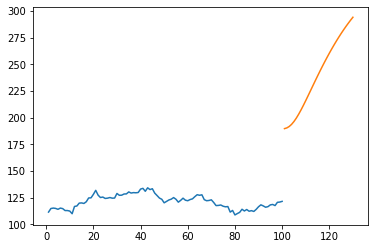

In [46]:
lib.plot(day_new,scaler.inverse_transform(data1[1935:]))
lib.plot(day_pred, scaler.inverse_transform(lst_output))

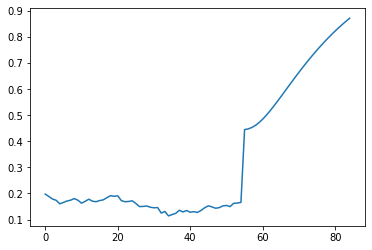

In [47]:
sds = data1.tolist()
sds.extend(lst_output)
lib.plot(sds[1980:])

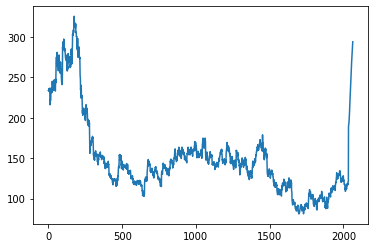

In [48]:
sds=scaler.inverse_transform(sds).tolist()
lib.plot(sds)